<a href="https://colab.research.google.com/github/PaulLipska/Food-Sales-Predictions/blob/main/Paul_Lipska_Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Food_Sales_Predictions**
  

Name: Paul Lipska

## Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQovStC0dNUTh7N2V6Usq9wBbGE0LlUzu2wKRGyx8vbATMulLyOrrO6kAMnTL3HS_XpQ9WRBN74rLJl/pub?gid=1686973610&single=true&output=csv"
df = pd.read_csv(url)


## Data Cleaning

In [ ]:
df.shape

(8523, 12)

      * There are 8523 rows and 12 columns

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df['Item_Fat_Content'].value_counts()

Identified irregular strings meant to resemble the same data

In [ ]:

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Column 'Item_Fat_Content' cleaned

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Grocery Store could be perceived as a fourth type.  Changing data to conform

In [ ]:

df['Outlet_Type'] = df['Outlet_Type'].replace('Grocery Store', 'Supermarket Type4')

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Supermarket Type4    1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

This fits better with the data

Reviewing integers and floats, found no glaring differences.  Formating data for dollar ammounts by rounding to 2nd place

In [ ]:

df['Item_MRP'] = df['Item_MRP'].round(2)
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].round(2)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.016760,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.10,OUT010,1998,NaN,Tier 3,Supermarket Type4,732.38
4,NCD19,8.93,Low Fat,0.000000,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


Dollar values expressed correctly

In [ ]:
df.duplicated().sum()

0

  * Zero duplicates

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Identifying % of missing data (optional)

In [ ]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
df[df.isna().any(axis =1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.10,OUT010,1998,NaN,Tier 3,Supermarket Type4,732.38
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.76,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.76
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.97,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.60
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.82,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.54
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.28,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.67
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.75,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.61
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.47,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.96
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.99,OUT010,1998,NaN,Tier 3,Supermarket Type4,424.78
8514,FDA01,15.00,Regular,0.054489,Canned,57.59,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.72


    * Missing Values
      *There are 1463 missing values in the Item_Weight column. (17.1%)
      *There are 2410 missing values in the Outlet_Size column. (28.27%)
    *In order to make informed decisions about have to handle missing data, we will do some additional EDA
    

## Evaluating missing values

In [ ]:
#value counts prior to remedy
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

Resolving NAN values

In [ ]:
# Finding the average weight of values in 'Item Weight' column

avg_weight = df['Item_Weight'].median()
print(avg_weight)

12.6


Replacing NAN values with Median value

In [ ]:
df['Item_Weight'].fillna(avg_weight, inplace = True)

In [ ]:
#value counts after remedy
df['Item_Weight'].value_counts()

12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64

Used method .median() to cure NAN in 'Item_Weight'

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Resolving NAN values in 'Outlet_Size'.  Replacing NAN values with "Missing"

In [ ]:
#value counts prior to remedy
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#fill in NAN values with "Missing"
df['Outlet_Size'].fillna('Missing', inplace = True)

In [ ]:
#value counts after remedy
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

All NAN values removed and replaced with "Missing"

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Explanatory Visuals

See below for results of cured data sets.

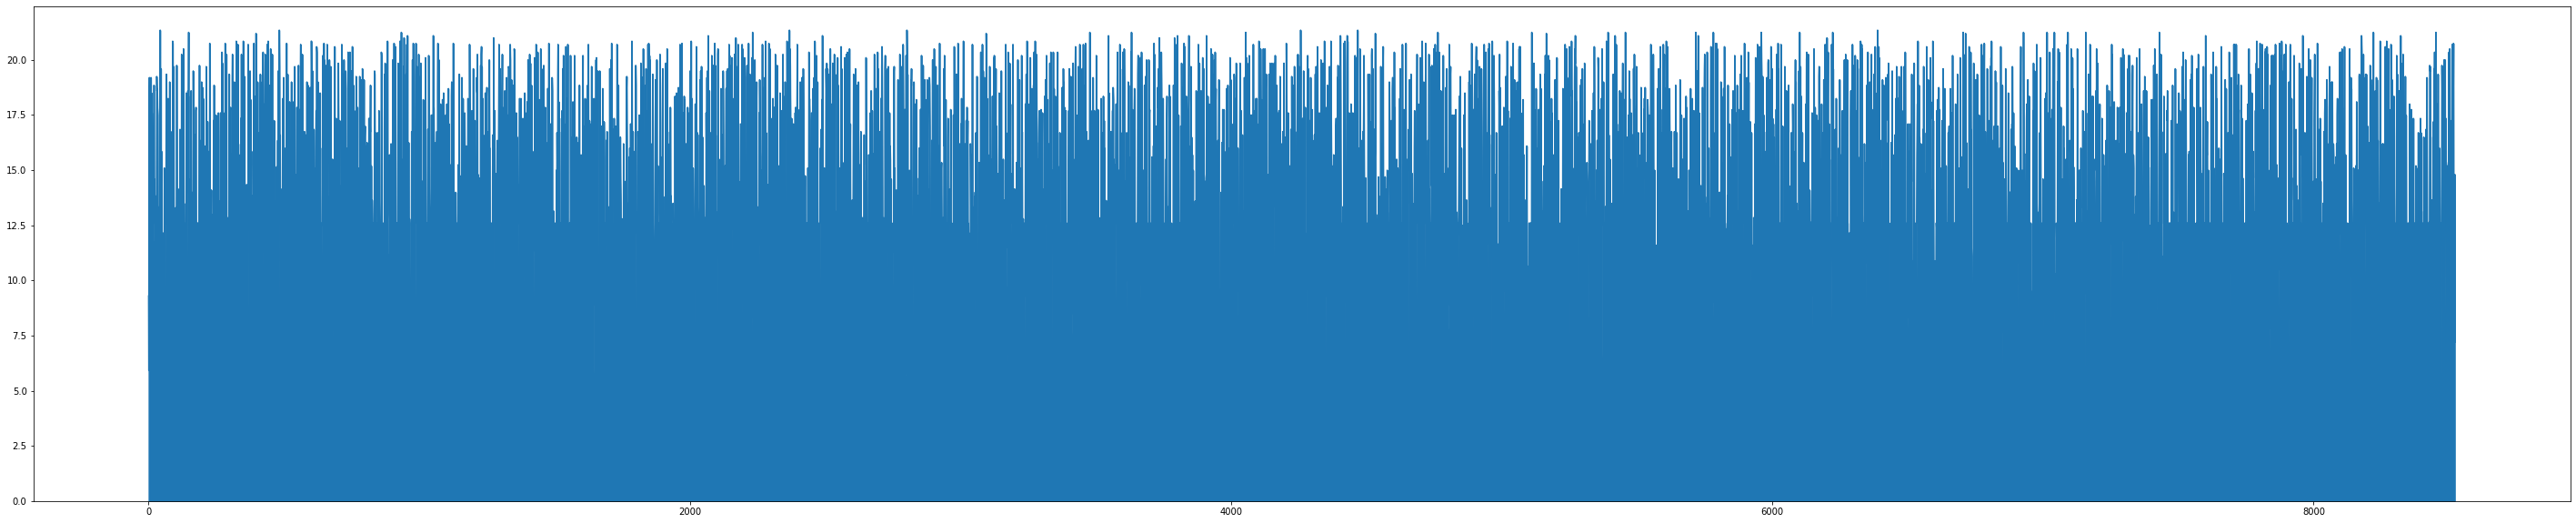

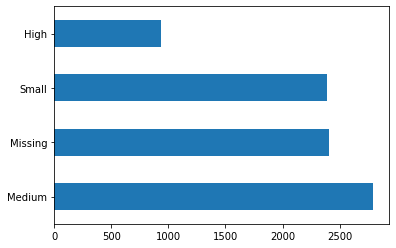

In [ ]:
res=df['Item_Weight']

axs = res.plot.area(figsize=(50,10), subplots = True)

plt.show()

df['Outlet_Size'].value_counts()[:20].plot(kind='barh')

#Min, Max, Mean of datasets

Item_Weight

In [ ]:

df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

Item_Visibility

In [ ]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

Item_MRP

In [ ]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992810
std        62.275166
min        31.290000
25%        93.825000
50%       143.010000
75%       185.645000
max       266.890000
Name: Item_MRP, dtype: float64

Outlet_Establishment_Year

In [ ]:
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

Item_Outlet_Sales

In [ ]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288926
std       1706.499605
min         33.290000
25%        834.245000
50%       1794.330000
75%       3101.300000
max      13086.960000
Name: Item_Outlet_Sales, dtype: float64

#Exploratory Visuals & Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.016760,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.10,OUT010,1998,Missing,Tier 3,Supermarket Type4,732.38
4,NCD19,8.93,Low Fat,0.000000,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


##Histogramn of Item Weight

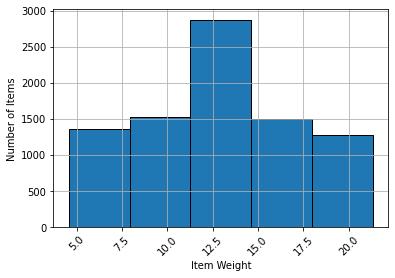

In [ ]:
df['Item_Weight'].hist(bins = 5,edgecolor='black')
plt.xlabel("Item Weight")
plt.ylabel("Number of Items")
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')


###Average item for this study weights about 12.6 which represent the median value for this graph.  Given the volume of this item needed vs the volume of heavier items one can have a discussion around freight or supply chain based on this insight.

#Boxplot of Sales by Store Type

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

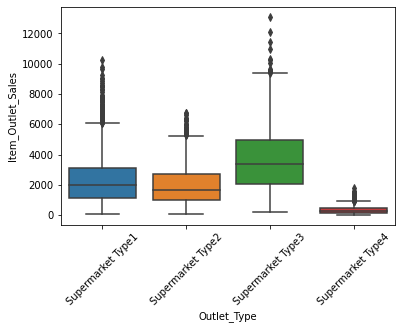

In [ ]:
#sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
sns.boxplot(data=df, x="Outlet_Type", y="Item_Outlet_Sales", order=['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Supermarket Type4']);
plt.xticks(rotation = 45)

###From the above boxplot you can see the sales per supermarket type and the span of outliers between the different types

#Heatmap for Outlet Sales Being a Function of Item Weight

In [ ]:
corr = df.corr()
print(corr)

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014168  0.024951   
Item_Visibility              -0.014168         1.000000 -0.001315   
Item_MRP                      0.024951        -0.001315  1.000000   
Outlet_Establishment_Year     0.007739        -0.074834  0.005020   
Item_Outlet_Sales             0.009693        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                 0.007739           0.009693  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


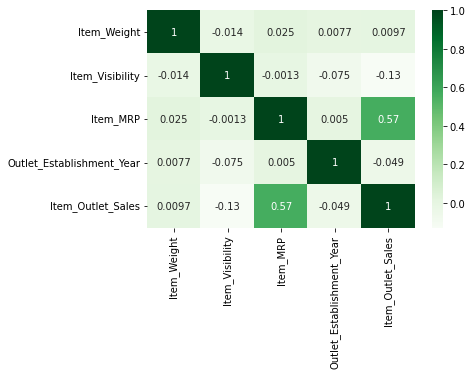

In [ ]:
sns.heatmap(corr, cmap = 'Greens',annot = True);

##You can see above the negative relationship between an items weight and Item Outlet Sales.  Per the histogram earlier you can see the bulk of sales were for items around 12.6 while heavier items were nearly half or less than.

#Placeholder for part 4

#Future Sales Predictions

#Import Libraries

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

#Reloading data

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQovStC0dNUTh7N2V6Usq9wBbGE0LlUzu2wKRGyx8vbATMulLyOrrO6kAMnTL3HS_XpQ9WRBN74rLJl/pub?gid=1686973610&single=true&output=csv"
df2 = pd.read_csv(url)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Explore the Data

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Display Missing Values

In [ ]:
#displaying missing values
df2.isna().sum().sum()

3873

In [ ]:
#afflicted columns
df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Looking for Duplicate Rows

In [ ]:
df2.duplicated().sum()

0

In [ ]:
#resolving previous duplicate values before pre-processing
df2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:

df2['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df2['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df2['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

#Ordinal Encoding

In [ ]:
df2['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#replaceing Ordinal values
replacement_dictionary = {'High':2, 'Medium':1, 'Small':0}
df2['Outlet_Size'].replace(replacement_dictionary, inplace=True)


In [ ]:
#checking replacement values
df2['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

#Validation Split

In [ ]:
#Making copy of df
eda_ml = df2.copy()
X = eda_ml.drop(columns='Item_Outlet_Sales').copy()
y = eda_ml['Item_Outlet_Sales'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


#Instantiate Column Selectors

In [ ]:
cat_selectors = make_column_selector(dtype_include = 'object')
num_selectors = make_column_selector(dtype_include = 'number')

#Instantiate Transformers

In [ ]:
#instantiate the StandardScaler, OneHotEncoder, and Imputers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

#Instantiate Pipelines

In [ ]:
#numeric_pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
#categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

#Instantiate ColumnTransformer


In [ ]:
#Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selectors)
category_tuple = (categorical_pipe, cat_selectors)
#ColumnTransformers
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f08a5b953d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f08a5bc5ac0>

#Transformer Data

In [ ]:
#fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f08a5b953d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f08a5bc5ac0>

In [ ]:
#transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

#Showing Results

In [ ]:
#Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1590)


array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

Update test